In [1]:
%matplotlib inline

In [2]:
import data
from evaluate_model import evaluate_model, train_model
x, xtrain, xcross, xtest = data.load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')

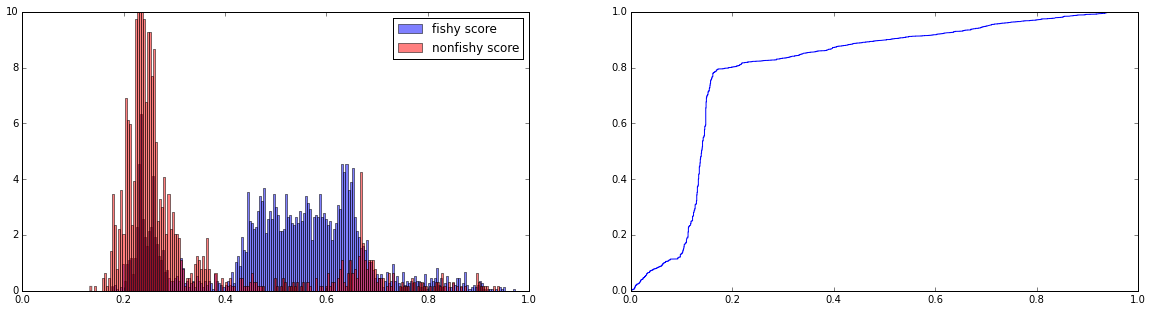

<legacy_heuristic_model.LegacyHeuristicModel instance at 0x10a5955f0>

AUC: 0.797325285273
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.49      0.85      0.62      1577
    fishing       0.90      0.59      0.71      3423

avg / total       0.77      0.67      0.68      5000

False positive rate: 0.046


In [3]:
from legacy_heuristic_model import LegacyHeuristicModel

lhm1_args = dict(window=3600)
lhm1 = train_model(LegacyHeuristicModel(), xtest, **lhm1_args)
evaluate_model(lhm1, xtest, **lhm1_args)

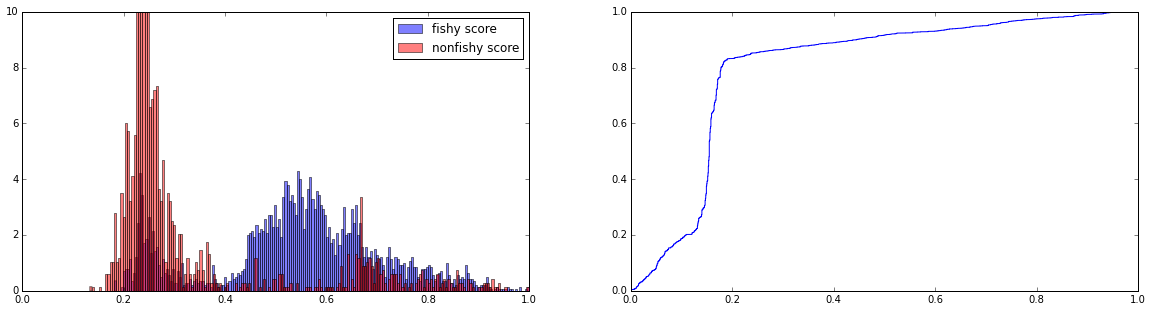

<legacy_heuristic_model.LegacyHeuristicModel instance at 0x10a595248>

AUC: 0.801246500833
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.54      0.84      0.65      1577
    fishing       0.90      0.67      0.76      3423

avg / total       0.78      0.72      0.73      5000

False positive rate: 0.052


In [4]:
lhm2_args = dict(window=10800)
lhm2 = train_model(LegacyHeuristicModel(), xtrain, **lhm2_args)
evaluate_model(lhm2, xtest, **lhm2_args)

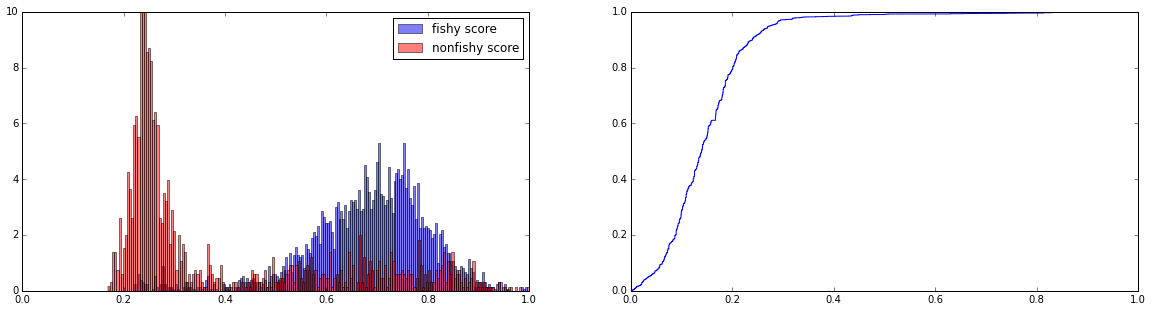

<legacy_heuristic_model.LegacyHeuristicModel instance at 0x10bfe46c8>

AUC: 0.850124887205
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.84      0.74      0.79      1577
    fishing       0.89      0.94      0.91      3423

avg / total       0.87      0.87      0.87      5000

False positive rate: 0.0828


In [12]:
lhm3_args = dict(window=43200)
lhm3 = train_model(LegacyHeuristicModel(), xtrain, **lhm3_args)
evaluate_model(lhm3, xtest, **lhm3_args)

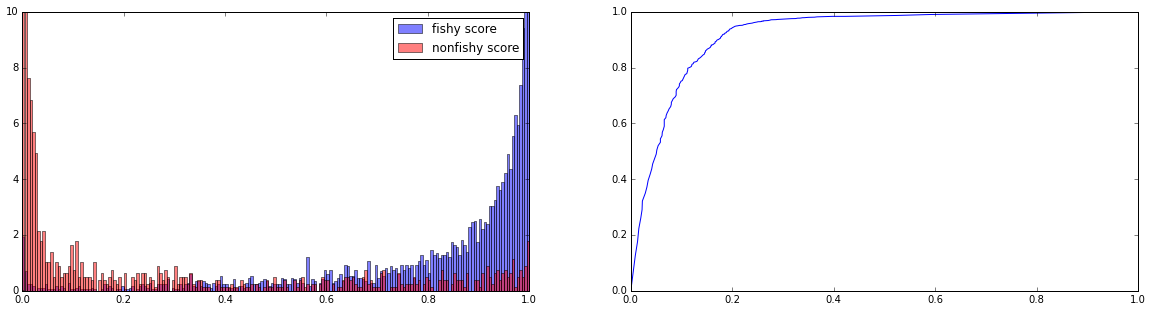

RandomForestModel(n_estimators=200, random_state=0)

AUC: 0.921900990187
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.79      0.83      0.81      1577
    fishing       0.92      0.90      0.91      3423

avg / total       0.88      0.88      0.88      5000

False positive rate: 0.0536


In [6]:
from random_forest_model import RandomForestModel

rfm1_args = dict(windows=[43200])
rfm1 = train_model(RandomForestModel(), xtrain, **rfm1_args)
evaluate_model(rfm1, xtest, **rfm1_args)

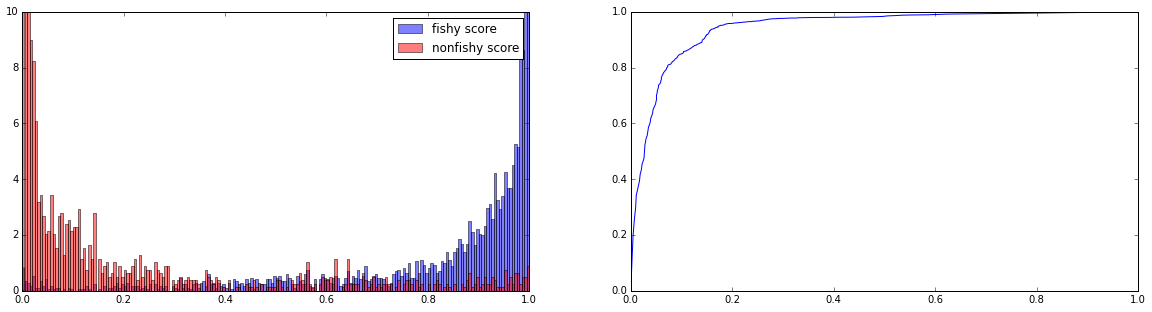

RandomForestModel(n_estimators=200, random_state=0)

AUC: 0.943736012364
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.80      0.86      0.83      1577
    fishing       0.93      0.90      0.92      3423

avg / total       0.89      0.89      0.89      5000

False positive rate: 0.0452


In [7]:
rfm2_args = dict(windows=[1800, 3600, 10800, 21600, 43200, 86400])
rfm2 = train_model(RandomForestModel(), xtrain, **rfm2_args)
evaluate_model(rfm2, xtest, **rfm2_args)

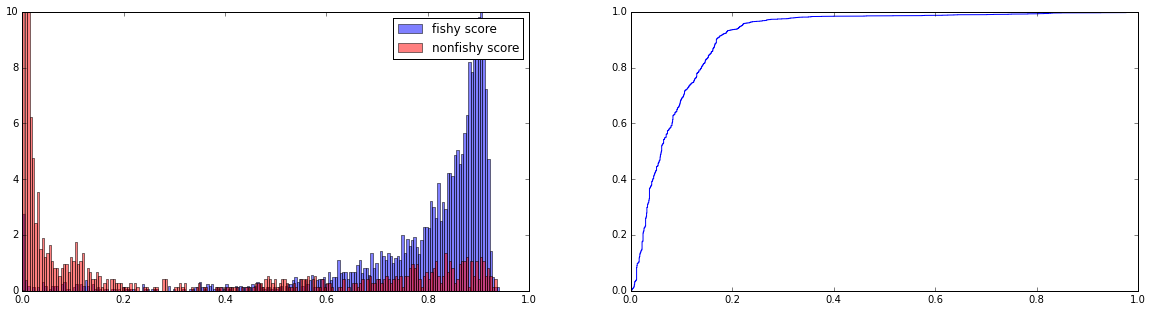

LogisticModel(C=1.0, class_weight=None, dual=False, fit_intercept=True,
       intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
       penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
       verbose=0, warm_start=False)

AUC: 0.910746357356
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.85      0.80      0.83      1577
    fishing       0.91      0.94      0.92      3423

avg / total       0.89      0.89      0.89      5000

False positive rate: 0.0626


In [8]:
from logistic_model import LogisticModel

lm1_args = dict(windows=[43200], order=6)
lm1 = train_model(LogisticModel(), xtrain, **lm1_args)
evaluate_model(lm1, xtest, **lm1_args)

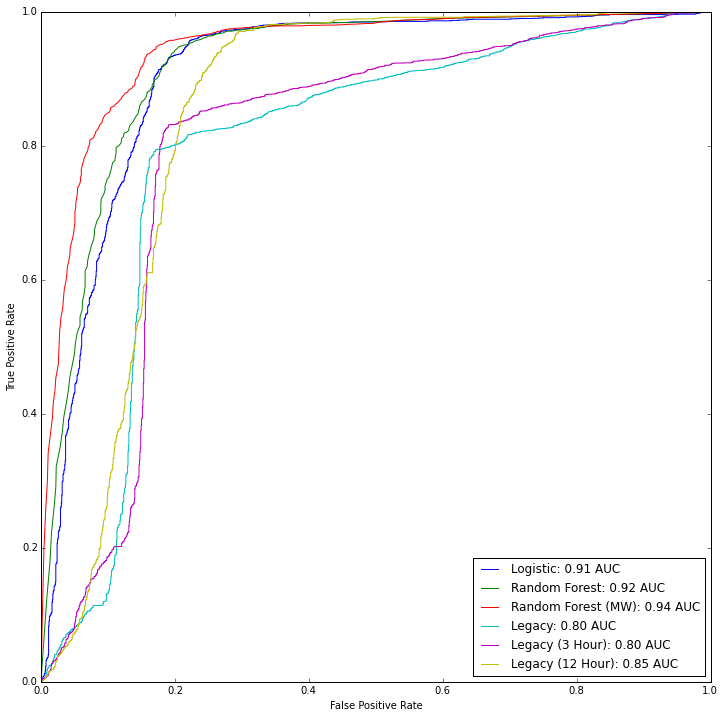

In [13]:
del evaluate_model
import evaluate_model, imp
imp.reload(evaluate_model)
from evaluate_model import evaluate_model, train_model, compare_auc

compare_auc([('Logistic', lm1, lm1_args),
             ('Random Forest', rfm1, rfm1_args),
             ('Random Forest (MW)', rfm2, rfm2_args),
             ('Legacy', lhm1, lhm1_args),
             ("Legacy (3 Hour)", lhm2, lhm2_args),
             ("Legacy (12 Hour)", lhm3, lhm3_args)], xtest)